## Testing the BPASS Isochrone at $10^{7.0}$ Years Age and Comparing with MIST Model (Solar Metallicity)
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 10^7 years age, solar metallicity, AKs=0.0, and distance of 1000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram ($B-V$ vs $M_V$), and the mass luminosity relationship of the cluster.

## This is for example as well as debugging purposes.

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
iso1=synthetic.Isochrone_Binary(7.0, 0.0, 1000,
                                math.log10(1), mass_sampling=1)


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1794: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to logg=4.00 for T= 35763 logg=3.88
Changing to T= 50000 for T=102134 logg=5.40
Changing to logg=5.00 for T=102134 logg=5.40
Changing to T= 50000 for T= 83086 logg=4.67
Changing to logg=5.00 for T= 83086 logg=4.67
Changing to T= 50000 for T= 73318 logg=4.84
Changing to logg=5.00 for T= 73318 logg=4.84
Changing to T= 50000 for T=101667 logg=5.41
Changing to logg=5.00 for T=101667 logg=5.41
Changing to logg=4.00 for T= 31761 logg=3.51
Changing to logg=4.00 for T= 31615 logg=3.92
Changing to T= 50000 for T= 63838 logg=4.53
Changing to logg=5.00 for T= 63838 logg=4.53
Changing to T= 50000 for T= 67724 logg=4.33
Changing to logg=5.00 for T= 67724 logg=4.33
Changing to T= 50000 for T= 72205 logg=4.44
Changing to logg=5.00 for T= 72205 logg=4.44
Changing to T= 50000 for T= 90738 logg=5.12
Changing to logg=5.00 for T= 90738 logg=5.12
Changing to T= 50000 for T= 71698 logg=4.79
Changing to logg=5.00 for T= 71698 logg=4.79
Changing to T= 50000 for T=101368 logg=5.42
Changing to logg=5.0

Will check if all of the indices in the BPASS isochrone are valid, i.e. are 5, 101, 102, 103, or -99 (-99 is for merged))

In [2]:
import numpy as np
np.all([(x == 5 or x == 101 or x==102 or x==103) for x in iso1.primaries['phase']])

True

In [3]:
np.all([(x == 5 or x == 101 or x==102 or x==103) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x == 5 or x == 101 or x == -99 or x==102 or x==103) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries and secondaries accounting for NaNs in the columns. (For max we make NaNs the same as - infinity and for median and mean, we do not include them)

In [5]:
np.max(iso1.singles['logg'])

4.591806913365015

In [6]:
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

5.898517399939001

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg'], -np.inf))

5.7676806790772

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.178243141326868

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

4.108995846829808

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

3.96292885544605

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.194452095013302

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

4.075886239648769

In [13]:
np.median(iso1.secondaries['logg'][[np.where(~np.isnan(iso1.secondaries['logg']))]])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


4.239978886358815

Text(0.5, 0, 'logg in cgs')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


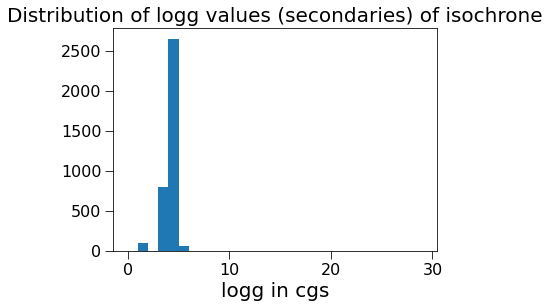

In [14]:
import matplotlib.pyplot as plt
plt.title("Distribution of logg values (secondaries) of isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

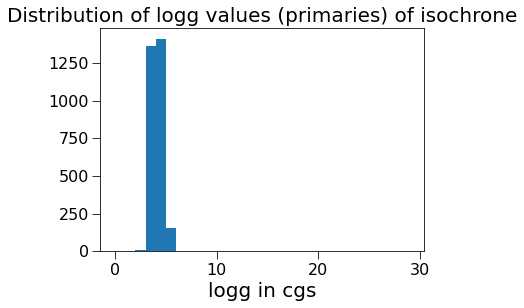

In [15]:
import matplotlib.pyplot as plt
plt.title("Distribution of logg values (primaries) of isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

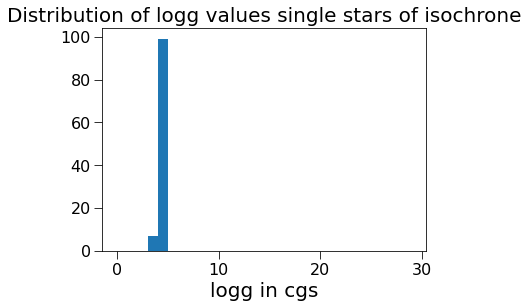

In [16]:
import matplotlib.pyplot as plt
plt.title("Distribution of logg values single stars of isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Now, for comparison, I will create a MISTv.1 isochrone of the same metallicity, age, distance from earth, and AKs.

In [17]:
iso2=synthetic.IsochronePhot(7.0, 0.0, 1000,
                             math.log(1), recomp=True) # New MIST v.1 isochrone for same metallicity

Changing to logg=3.50 for T= 26068 logg=3.41
Changing to logg=3.50 for T= 26167 logg=3.41
Changing to logg=3.50 for T= 26263 logg=3.42
Changing to logg=3.50 for T= 26355 logg=3.42
Changing to logg=3.50 for T= 26443 logg=3.42
Changing to logg=3.50 for T= 26528 logg=3.43
Changing to logg=3.50 for T= 26609 logg=3.43
Changing to logg=3.50 for T= 26685 logg=3.43
Changing to logg=3.50 for T= 26758 logg=3.43
Changing to logg=3.50 for T= 26826 logg=3.44
Changing to logg=3.50 for T= 26889 logg=3.44
Changing to logg=3.50 for T= 26943 logg=3.44
Changing to logg=3.50 for T= 26985 logg=3.44
Changing to logg=3.50 for T= 27008 logg=3.45
Changing to logg=3.50 for T= 27006 logg=3.45
Changing to logg=3.50 for T= 26955 logg=3.45
Changing to logg=3.50 for T= 26861 logg=3.44
Changing to logg=3.50 for T= 26740 logg=3.44
Changing to logg=3.50 for T= 26600 logg=3.44
Changing to logg=3.50 for T= 26446 logg=3.43
Changing to logg=3.50 for T= 26289 logg=3.42
Changing to logg=3.50 for T= 26128 logg=3.41
Changing t

Finding the max, median, and mean of the MISTv.1 isochrone's logg values

In [18]:
np.max(iso2.points['logg'])

4.3301956912058674

(array([ 60.,  57.,  78., 149., 210.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

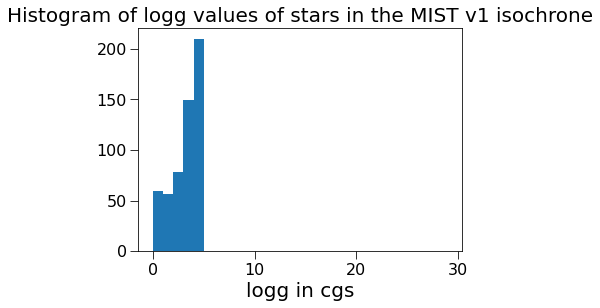

In [19]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the MIST v1 isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

In [20]:
np.median(iso2.points['logg'])

3.44315451781853

In [21]:
np.mean(iso2.points['logg'])

3.1148461826295915

In [22]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


Make the clusters corresponding to the binary star isochrone and the MISTv.1 isochrone

In [23]:
clus_1=synthetic.Cluster_w_Binaries(iso1, imf.IMFSalpeter1955(multiplicity=None),
                                    2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=None),
                                 2000, ifmr=ifmr.IFMR_Spera15())

Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence and perhaps the beginnings of the subgiant branch. That turnoff will turn out to be quite important when using the clusters to find age of real stellar populations.\n But first, let's look at the isochrones and plot the observers' and theorist's HR diagrams and juxtapose the evolution models.

Now we try Taking a look at the BPASS Cluster vs MIST cluster observer's HR Diagram.

Remember to account for distance modulus! (dist to cluster = 1000)

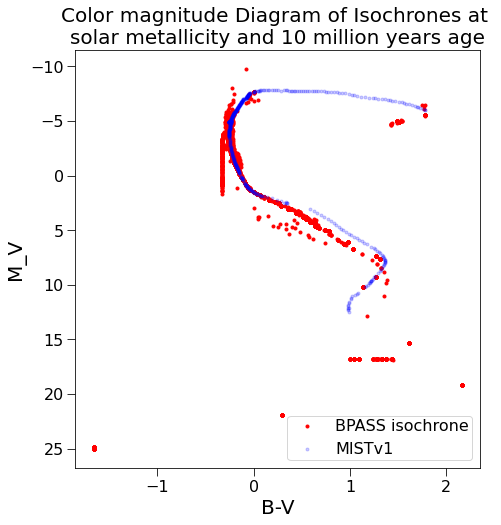

In [24]:
plt.figure(figsize = (7.5, 7.5))
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(1000 / 10), "r.")
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(1000 / 10), "r.")
plt.plot(iso1.singles['m_ubv_B'] - iso1.singles["m_ubv_V"],
         iso1.singles["m_ubv_V"] - 5 * np.log10(1000 / 10),
         "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B'] - iso2.points["m_ubv_V"],
         iso2.points["m_ubv_V"] - 5 * np.log10(1000 / 10), "b.",
         label="MISTv1", alpha=0.2)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at \n" +
          "solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

Then compare with a Hoki cluster (Salpeter-slope IMF from 0.1 to 0.5 M⊙ and a maximum mass of 300 solar masses). First I overaly the cluster with the cluster, and, in the next cell, put the Hoki cluster by itself. This is to show that the photometry values of the stars in the BPASS isochrone are about appropriate for the age and metallicity.

/g/lu/scratch/ryotainagaki/hoki/hoki/cmd.py:196: RuntimeWarning: divide by zero encountered in log10
  self._log_ages = np.concatenate((np.array([0]), np.log10(self._my_data[1,1:])))
/g/lu/scratch/ryotainagaki/hoki/hoki/cmd.py:212: RuntimeWarning: divide by zero encountered in log10
  self._log_ages = np.concatenate((np.array([0]), np.log10(self._my_data[1,1:])))
/g/lu/scratch/ryotainagaki/hoki/hoki/cmd.py:348: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greys").copy()
  colMap.set_under(color='white')


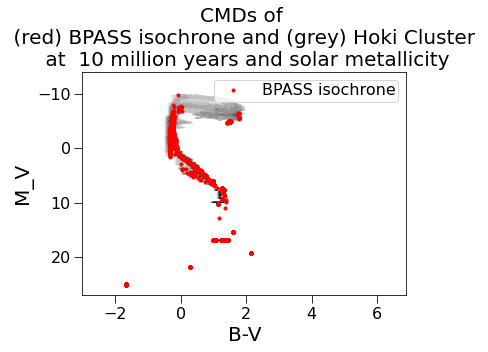

In [25]:
import hoki
from hoki.cmd import CMD
input_file = ('/u/ryotainagaki/Desktop/ryotainagaki/BPASS/' +
              'bpass_v2.2.1_imf135_300/input_bpass_z020_bin_imf135_300')
mycmd = CMD(input_file)
mycmd.make(mag_filter='V', col_filters=['B', 'V'])
mycmd.plot(log_age=7.0)
# actually makes and fills the grids - this is the time and memory consuming step
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(1000/10), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(1000/10), "r.")
plt.plot(iso1.singles['m_ubv_B'] - iso1.singles["m_ubv_V"],
         iso1.singles["m_ubv_V"] - 5 * np.log10(1000/10), "r.",
         label="BPASS isochrone")
plt.ylabel("M_V")
plt.title("CMDs of \n (red) BPASS isochrone and (grey)" +
          " Hoki Cluster \n at  10 million years and solar metallicity")
plt.legend()

/g/lu/scratch/ryotainagaki/hoki/hoki/cmd.py:348: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greys").copy()
  colMap.set_under(color='white')
No handles with labels found to put in legend.


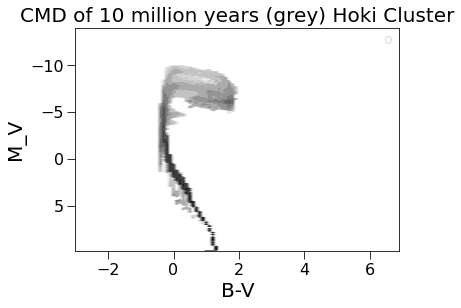

In [26]:
mycmd.plot(log_age=7.0)
plt.ylabel("M_V")
plt.title("CMD of 10 million years (grey) Hoki Cluster")
plt.legend()

Now, I try to find the source of the vertical "line segment" in the top left corner of the BPASS isochrone

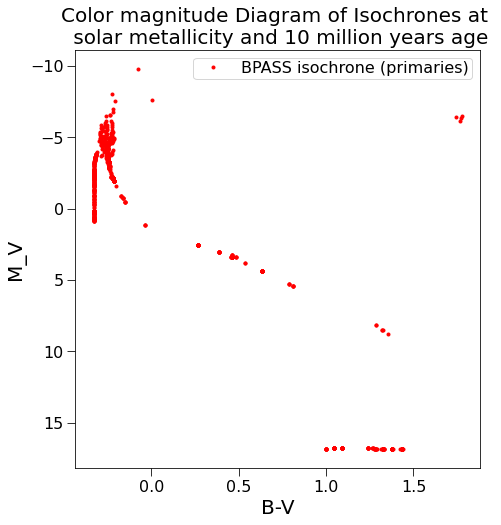

In [27]:
# Taking a look at the BPASS Cluster vs MIST cluster Observer's HR Diagram
# Remember to use a distance modulus!
plt.figure(figsize = (7.5, 7.5))
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(1000/10), "r.",
         label="BPASS isochrone (primaries)")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at \n" +
          " solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

In [28]:
line = iso1.primaries[np.where(((iso1.primaries['m_ubv_B'] -
                                 iso1.primaries["m_ubv_V"]) < -0.3) &
                               ((iso1.primaries['m_ubv_B'] -
                                 iso1.primaries["m_ubv_V"]) > -0.5))[0]]

In [29]:
iso1.secondaries[np.where(((iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"]) < -0.3) &
                          ((iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"]) > -0.5))[0]]

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64
17.1,-0.2755004086880293,2.581023323661638e+31,24765.0950972531,9807809082.93667,3.372089168724686,False,17.07346,5.0,False,1,3.8867186400771008,5.089752335222459,4.849530356361005,5.181655004521296,5.406994997685946
8.4,1.044556591311971,1.408581334391018e+30,20178.55207785059,3451294372.896646,4.175145535759932,False,13.43377,5.0,False,1,6.817836073751821,7.798406951597131,7.59268199228204,7.8780963717014325,8.069519102150933
7.2,-0.9093114086880292,8.085221628723427e+29,21282.860576975516,2350401217.2202835,4.241459310736706,False,7.258246,5.0,False,1,7.512302407811929,8.535909573406425,8.321829972320938,8.620629778203632,8.82283290836493
3.8000000000000003,-0.8986564086880291,7.630656943082565e+28,14384.34199226156,1580782077.518744,4.3050579558158235,False,3.800934,5.0,False,1,9.457227676828774,10.09572101343803,9.964134398328914,10.143527175999415,10.265777753515541
10.799999999999999,-0.5356654086880293,3.775304007818359e+30,26326.310549503658,3319418448.4547696,4.12056449854774,False,10.95915,5.0,False,1,6.171843375753551,7.3707454757059425,7.121010334022642,7.472073842940506,7.710658324370102
14.0,-0.4454804086880293,1.0622626927995523e+31,28381.8042248101,4790733399.160866,3.915472420865279,True,14.23524,5.0,False,1,5.1375700751137705,6.400449773494817,6.135095445698542,6.508115386294122,6.759560223676305
2.1,0.11900959131197064,7.469506836750609e+27,9446.4797950262,1146758593.646741,4.326191058155279,False,2.10002,5.0,False,1,11.699055039867728,11.666816941023702,11.697578408398057,11.66179470089613,11.663256553314188
13.299999999999999,1.0604875913119707,8.795730802512516e+30,23739.414310064312,6231061006.952435,3.8766183531871814,False,22.02068,5.0,False,1,5.060849944816225,6.194995896655713,5.960125989011014,6.2872571415626615,6.508380718313637


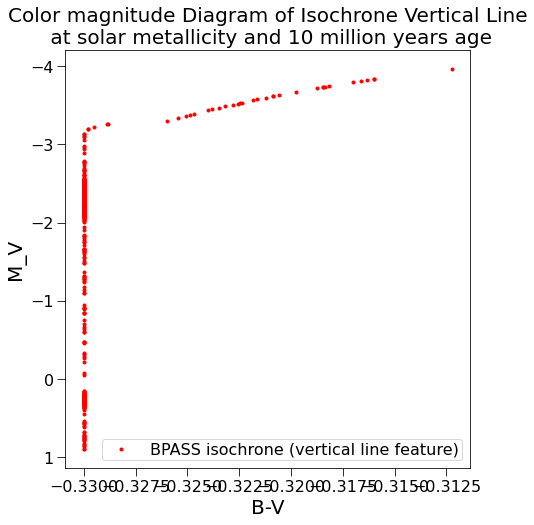

In [30]:
# Taking a look at the BPASS Cluster vs MIST Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
plt.figure(figsize = (7.5, 7.5))
plt.plot(line['m_ubv_B'] - line["m_ubv_V"],
         line["m_ubv_V"] - 5 * np.log10(1000/10),
         "r.",  label="BPASS isochrone (vertical line feature)")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrone Vertical Line\n" +
          " at solar metallicity and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

What exactly is causing this line. We need to look specifically at the properties of the stars there. Specifically current mass, source code of the star, logg, initial mass, Teff.

In [31]:
line

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
19.0,2.351537609741078e+31,102133.91979406652,550712791.7430351,5.399585032488795,True,5.7541,5.0,1,8.781839319362552,10.224458277064956,9.894453119695973,10.359067524277883,10.640208585673976
21.0,6.360070490769697e+31,83086.4110779113,1368548409.3653755,4.666033340205703,True,6.56305,5.0,1,6.805164319362551,8.247783277064954,7.917778119695973,8.382392524277883,8.663533585673976
18.0,2.19979357423166e+31,73317.89709025402,1033618239.0920144,4.839341892580129,True,5.57923,5.0,1,7.414664319362554,8.857283277064957,8.527278119695975,8.991892524277885,9.273033585673979
19.0,2.2066422492892533e+31,101666.99800054939,538387743.1165333,5.408546884340459,True,5.61383,5.0,1,8.83098931936255,10.273608277064953,9.943603119695972,10.408217524277882,10.689358585673974
18.0,2.661717310857011e+31,63838.106949913585,1499719934.5165932,4.5266879807002285,True,5.71795,5.0,1,6.606414319362552,8.049033277064956,7.719028119695975,8.183642524277884,8.464783585673977
20.0,5.140340987235719e+31,67723.59439418264,1851847263.9359167,4.327221057938412,True,5.50774,5.0,1,6.148439319362548,7.591058277064952,7.26105311969597,7.725667524277879,8.006808585673973
21.0,5.520798915744219e+31,72205.4534999031,1688302113.813622,4.435896203303441,True,5.87934,5.0,1,6.349214319362555,7.791833277064959,7.461828119695977,7.9264425242778875,8.20758358567398
19.0,3.1455886498790618e+31,90738.16661473441,806975155.5043983,5.122599617296125,True,6.52908,5.0,1,7.952164319362555,9.394783277064958,9.064778119695976,9.529392524277885,9.81053358567398


In [32]:
np.unique(line['mass_current'])

4.44683
4.44977
4.5998
4.65934
4.82873
4.84274
4.87299
4.87838
4.93716
4.94025
4.94141


In [33]:
np.unique(line['source'])

1


In [34]:
np.unique(np.round(line['logg'], 1))

array([3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.8, 5.9])

In [35]:
np.unique(line['mass'])

18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0


Ah, that may be it: the initial mass of the stars int the line seem to be around the same, so it may be no surprise that there is a lack of variation in photometric properties. Something to look into

In [36]:
np.unique(line['Teff'])

40176.30570815856
41742.648418365585
41746.493235422786
41892.858997499614
42028.12352270204
42214.33964168818
42779.92314328989
42886.44029776927
42917.06362617361
42929.91217391684
43082.41104793726


In [37]:
np.unique(line['logg'])

3.6332073972549237
3.7038563983228467
3.7038666362250434
3.7103699946524853
3.71621488084477
3.724462774822909
3.7489510518509084
3.7535231016378012
3.7550653401095855
3.7554038345778804
3.7620863942195215


In [38]:
np.unique(np.round(np.log10(line['L']), 1))

array([31. , 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. ,
       32.1])

Generating the Theorist's HR Diagram for the isochrone. Notice the alignment of features.

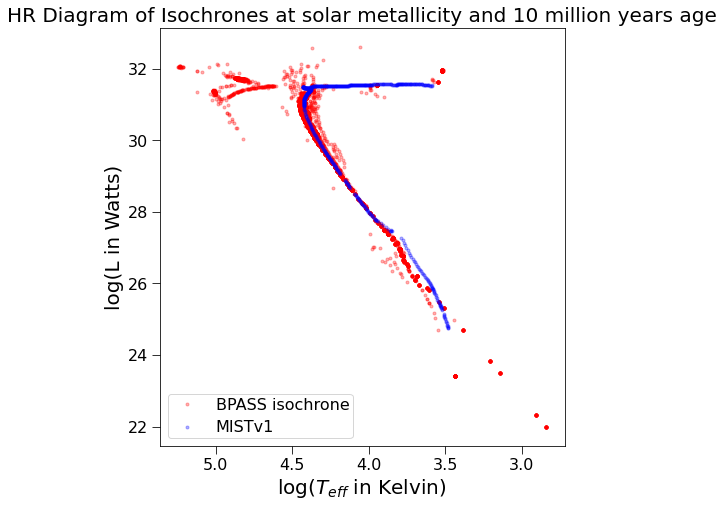

In [39]:
plt.figure(figsize = (7.5, 7.5))
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]),
         "r.", alpha = 0.3)
plt.plot(np.log10(iso1.secondaries['Teff']),
         np.log10(iso1.secondaries["L"]), "r.", alpha = 0.3)
plt.plot(np.log10(iso1.singles['Teff']),
         np.log10(iso1.singles["L"]), "r.", alpha = 0.3,
         label="BPASS isochrone")
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]),
         "b.", alpha = 0.3, label="MISTv1")
plt.xlabel("log($T_{eff}$ in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at solar metallicity and 10 million years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit

Plot the mass-luminosity relationship of the ISOCHRONE

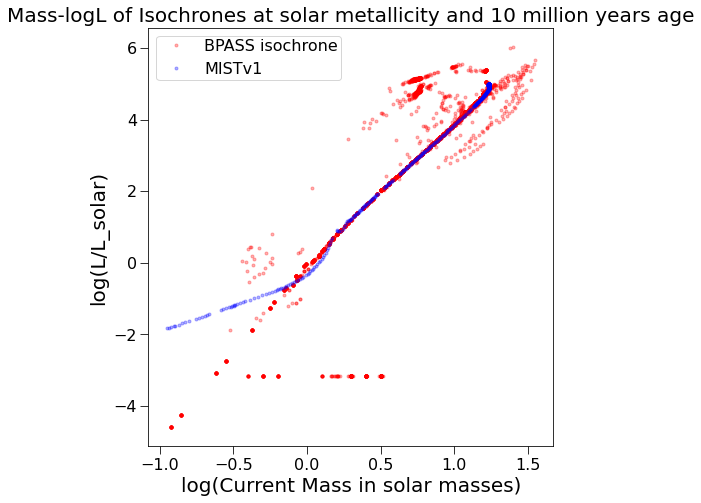

In [40]:
from astropy import constants as cs
plt.figure(figsize = (7.5, 7.5))
plt.plot(np.log10(iso1.primaries['mass_current']),
         np.log10(iso1.primaries["L"] / cs.L_sun), "r.", alpha = 0.3)
plt.plot(np.log10(iso1.secondaries['mass_current']),
         np.log10(iso1.secondaries["L"] / cs.L_sun), "r.", alpha = 0.3)
plt.plot(np.log10(iso1.singles['mass_current']),
         np.log10(iso1.singles["L"] / cs.L_sun),
         "r.", alpha = 0.3,label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']),
         np.log10(iso2.points["L"] / cs.L_sun), "b.", 
         alpha = 0.3, label="MISTv1")
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("Mass-logL of Isochrones at solar metallicity and 10 million years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Inspecting what masses are represented by the cluster

Taking a look at the BPASS Cluster vs MIST Settings cluster Observer's HR Diagram

**Remember to use a distance modulus!** (dist to cluster  = 1000 pc)

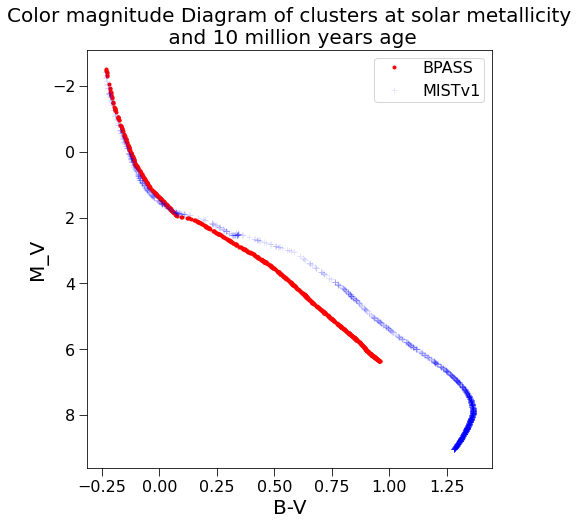

In [41]:
plt.figure(figsize = (7.5, 7.5))
plt.plot(clus_1.star_systems['m_ubv_B'] - clus_1.star_systems["m_ubv_V"],
         clus_1.star_systems["m_ubv_V"] - 5 * np.log10(1000 / 10), "r.",label="BPASS")
plt.plot(clus_2.star_systems['m_ubv_B'] - clus_2.star_systems["m_ubv_V"],
         clus_2.star_systems["m_ubv_V"] - 5 * np.log10(1000 / 10), "b+",
         label="MISTv1", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at solar metallicity\n" +
          " and 10 million years age")
plt.gca().invert_yaxis()
plt.legend()

Plotting the theorist HR Diagram of the clusters.

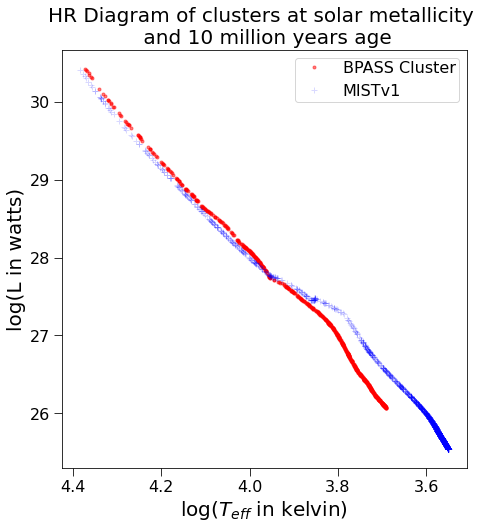

In [42]:
plt.figure(figsize = (7.5, 7.5))

plt.plot(np.log10(clus_1.star_systems['Teff']),
         np.log10(clus_1.star_systems["L"]),
         "r.", label="BPASS Cluster", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']),
         np.log10(clus_2.star_systems["L"]),
         "b+", label="MISTv1", alpha=0.15)
plt.xlabel("log($T_{eff}$ in kelvin)")
plt.ylabel("log(L in watts)")
plt.title("HR Diagram of clusters at solar metallicity \n" +
          " and 10 million years age")
plt.gca().invert_xaxis()
plt.legend()

Looking at which stars are the white dwarves?

In [43]:
import numpy as np
np.where(clus_1.star_systems['phase'] == 101.0)[0]

array([], dtype=int64)

Black Holes?

In [44]:
np.where(clus_1.star_systems['phase'] == 103.0)[0]

array([], dtype=int64)

Do we have any neutron stars?

In [45]:
np.where(clus_1.star_systems['phase'] == 102.0)[0]

array([], dtype=int64)

Let's make sure that I am getting just about enough star mass for my cluster. (It was a bug before I used an adjustment factor.)

In [46]:
clus_1.star_systems['systemMass'].sum()

2000.1534891980045

In [47]:
clus_2.star_systems['systemMass'].sum()

1999.470587306792

What systems do all of these companions correspond to?

Showing the current-mass and current-luminosity relationship of the clusters.

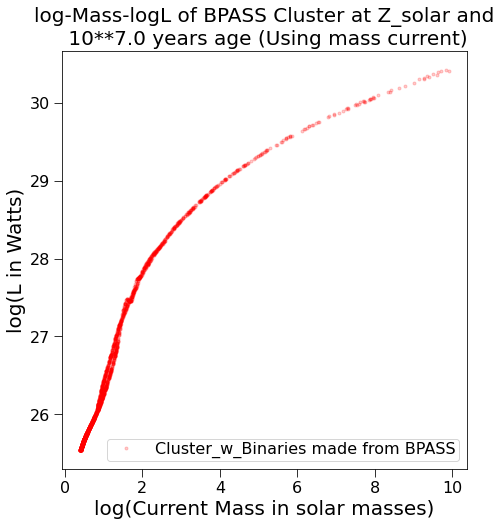

In [48]:
# Plot the mass-luminosity relationship
plt.figure(figsize = (7.5, 7.5))
plt.plot(clus_1.star_systems['mass_current'], np.log10(clus_1.star_systems["L"]),
         "r.", label="Cluster_w_Binaries made from BPASS", alpha =0.2)
plt.plot(clus_2.star_systems['mass_current'],
         np.log10(clus_2.star_systems["L"]), "r.", alpha=0.2)
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L in Watts)")
plt.title("log-Mass-logL of BPASS Cluster at Z_solar and\n" +
          " 10**7.0 years age (Using mass current)")
plt.legend()

What phases exist in the cluster?

In [49]:
np.unique(clus_1.star_systems['phase'])

-99.0
5.0


In [50]:
clus_1.star_systems[np.where(clus_1.star_systems['phase']==-99)[0]]

mass,systemMass,Teff,L,logg,isWR,mass_current,phase,IFMR_it,metallicity,isMultiple,merged,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bool,float64,float64,float64,float64,float64,float64
0.45597732756379455,0.45597732756379455,nan,nan,nan,nan,nan,-99.0,False,0.0,False,0.0,nan,nan,nan,nan,nan
0.6285252321227837,0.6285252321227837,nan,nan,nan,nan,nan,-99.0,False,0.0,False,0.0,nan,nan,nan,nan,nan
0.4745488747907661,0.4745488747907661,nan,nan,nan,nan,nan,-99.0,False,0.0,False,0.0,nan,nan,nan,nan,nan
0.5792448763067592,0.5792448763067592,nan,nan,nan,nan,nan,-99.0,False,0.0,False,0.0,nan,nan,nan,nan,nan
0.7231785818219882,0.7231785818219882,nan,nan,nan,nan,nan,-99.0,False,0.0,False,0.0,nan,nan,nan,nan,nan
0.7384297104385833,0.7384297104385833,nan,nan,nan,nan,nan,-99.0,False,0.0,False,0.0,nan,nan,nan,nan,nan
0.6904264987738077,0.6904264987738077,nan,nan,nan,nan,nan,-99.0,False,0.0,False,0.0,nan,nan,nan,nan,nan
0.654986006409066,0.654986006409066,nan,nan,nan,nan,nan,-99.0,False,0.0,False,0.0,nan,nan,nan,nan,nan
0.833960601244569,0.833960601244569,nan,nan,nan,nan,nan,-99.0,False,0.0,False,0.0,nan,nan,nan,nan,nan


In [51]:
clus_2.star_systems[np.where(clus_2.star_systems['phase']==-99)[0]]

mass,isMultiple,systemMass,Teff,L,logg,isWR,mass_current,phase,metallicity,m_ubv_U,m_ubv_B,m_ubv_V,m_ubv_R,m_ubv_I
float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
